<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Correlation**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis (EDA). You will examine the distribution of the data, identify outliers, and determine the correlation between different columns in the dataset.


## Objectives


In this lab, you will perform the following:


- Identify the distribution of compensation data in the dataset.

- Remove outliers to refine the dataset.

- Identify correlations between various features in the dataset.


## Hands on Lab


##### Step 1: Install and Import Required Libraries


In [1]:
# Install the necessary libraries
!pip install pandas
!pip install matplotlib
!pip install seaborn

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Step 2: Load the Dataset


In [2]:
# Load the dataset from the given URL
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"
df = pd.read_csv(file_url)

# Display the first few rows to understand the structure of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 3: Analyze and Visualize Compensation Distribution</h3>


**Task**: Plot the distribution and histogram for `ConvertedCompYearly` to examine the spread of yearly compensation among respondents.


/tmp/ipykernel_760/3788340072.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['ConvertedCompYearly'].dropna(), shade=True)


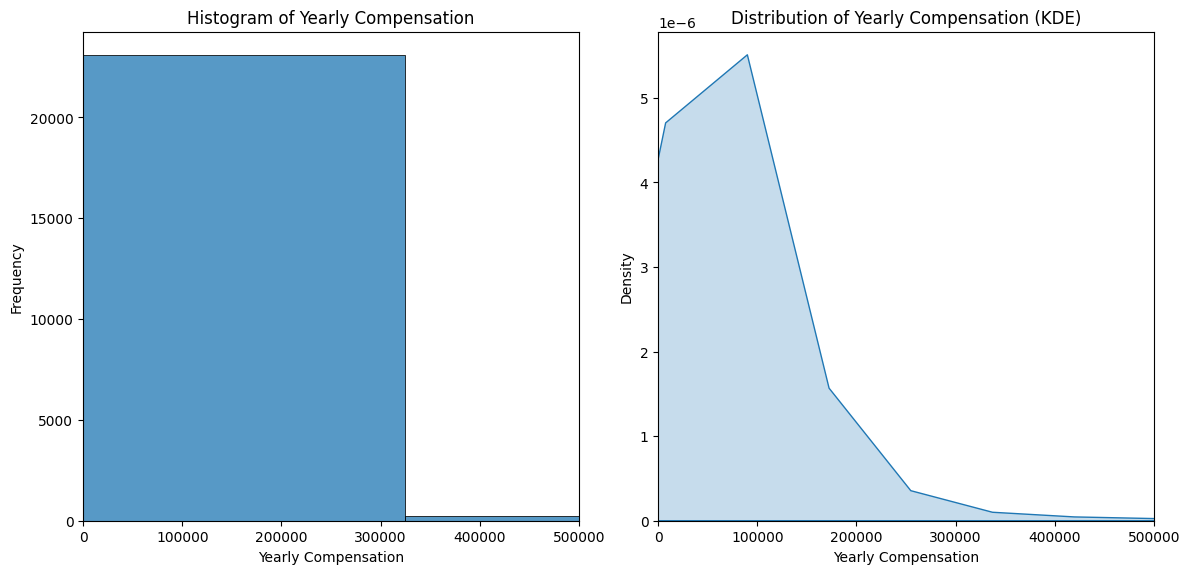

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['ConvertedCompYearly'].dropna(), bins=50, kde=False)
plt.title('Histogram of Yearly Compensation')
plt.xlim(0, 500000)  # limit x-axis to 500k
plt.xlabel('Yearly Compensation')
plt.ylabel('Frequency')

# KDE plot (smoothed distribution)
plt.subplot(1, 2, 2)
sns.kdeplot(df['ConvertedCompYearly'].dropna(), shade=True)
plt.title('Distribution of Yearly Compensation (KDE)')
plt.xlim(0, 500000)  # limit x-axis to 500k
plt.xlabel('Yearly Compensation')

plt.tight_layout()
plt.show()


<h3>Step 4: Calculate Median Compensation for Full-Time Employees</h3>


**Task**: Filter the data to calculate the median compensation for respondents whose employment status is "Employed, full-time."


In [6]:
# Filter for full-time employed respondents
full_time_df = df[df['Employment'] == 'Employed, full-time']

# Calculate the median compensation from ConvertedCompYearly column
median_compensation = full_time_df['ConvertedCompYearly'].median()

print(f"Median compensation for full-time employed respondents: ${median_compensation:,.2f}")


Median compensation for full-time employed respondents: $69,814.00


<h3>Step 5: Analyzing Compensation Range and Distribution by Country</h3>


Explore the range of compensation in the ConvertedCompYearly column by analyzing differences across countries. Use box plots to compare the compensation distributions for each country to identify variations and anomalies within each region, providing insights into global compensation trends.



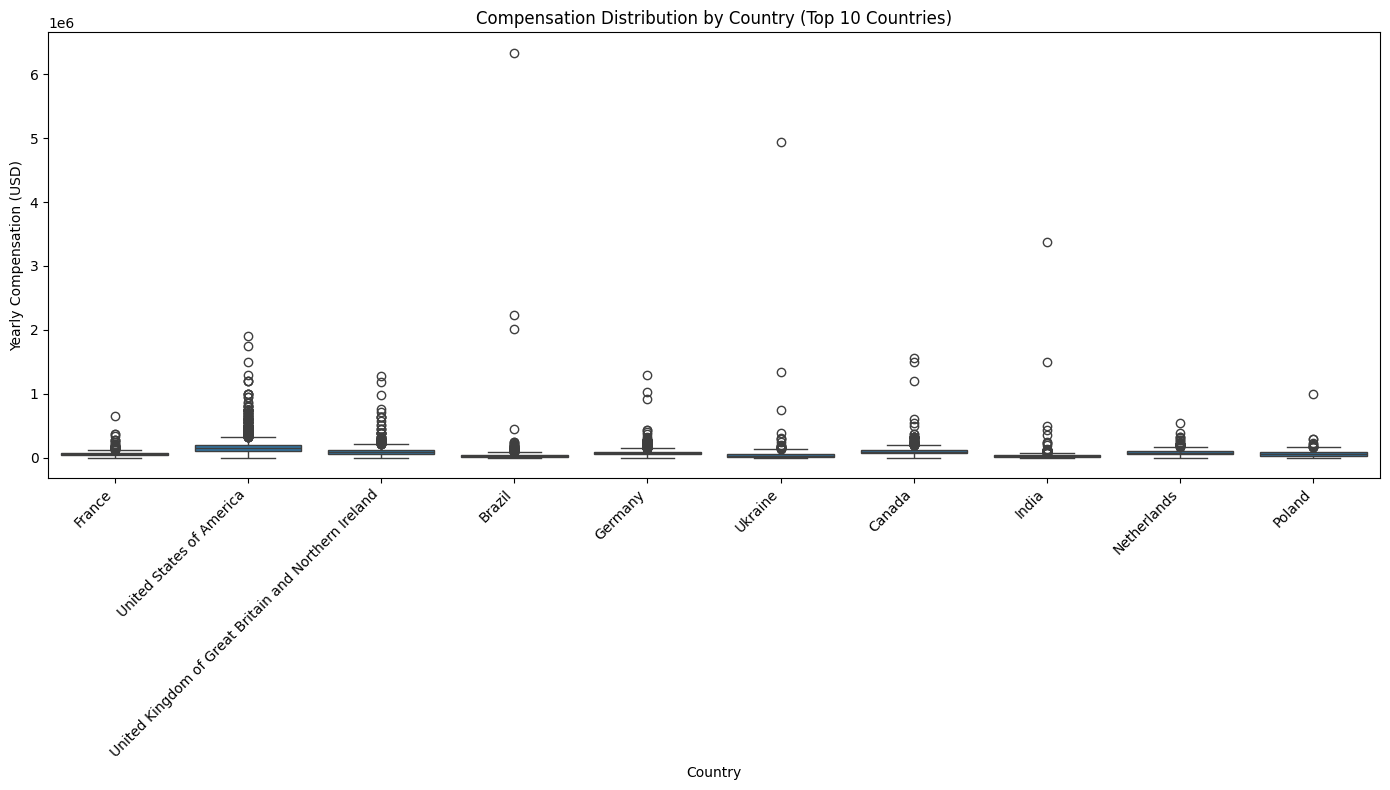

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optionally, select top N countries by number of respondents to keep the plot readable
top_countries = df['Country'].value_counts().head(10).index

# Filter dataset to only top countries
df_top_countries = df[df['Country'].isin(top_countries)]

# Remove rows with missing or zero compensation for better visualization
df_top_countries = df_top_countries[df_top_countries['ConvertedCompYearly'].notna()]
df_top_countries = df_top_countries[df_top_countries['ConvertedCompYearly'] > 0]

# Plot boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_top_countries, x='Country', y='ConvertedCompYearly')
plt.title('Compensation Distribution by Country (Top 10 Countries)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Yearly Compensation (USD)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

<h3>Step 6: Removing Outliers from the Dataset</h3>


**Task**: Create a new DataFrame by removing outliers from the `ConvertedCompYearly` column to get a refined dataset for correlation analysis.


In [8]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to exclude outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & (df['ConvertedCompYearly'] <= upper_bound)]

# Check the size difference
print(f"Original dataset size: {df.shape[0]}")
print(f"Filtered dataset size (without outliers): {df_no_outliers.shape[0]}")

# Now df_no_outliers can be used for correlation analysis or other tasks


Original dataset size: 65437
Filtered dataset size (without outliers): 22457


<h3>Step 7: Finding Correlations Between Key Variables</h3>


**Task**: Calculate correlations between `ConvertedCompYearly`, `WorkExp`, and `JobSatPoints_1`. Visualize these correlations with a heatmap.


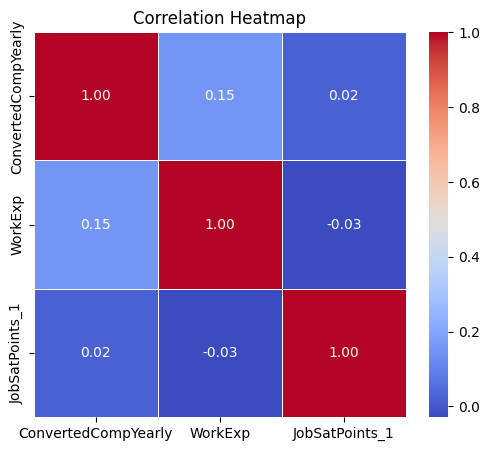

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the relevant columns
cols = ['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']

# Drop rows with missing values in these columns
df_corr = df[cols].dropna()

# Calculate the correlation matrix
corr_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


<h3>Step 8: Scatter Plot for Correlations</h3>


**Task**: Create scatter plots to examine specific correlations between `ConvertedCompYearly` and `WorkExp`, as well as between `ConvertedCompYearly` and `JobSatPoints_1`.


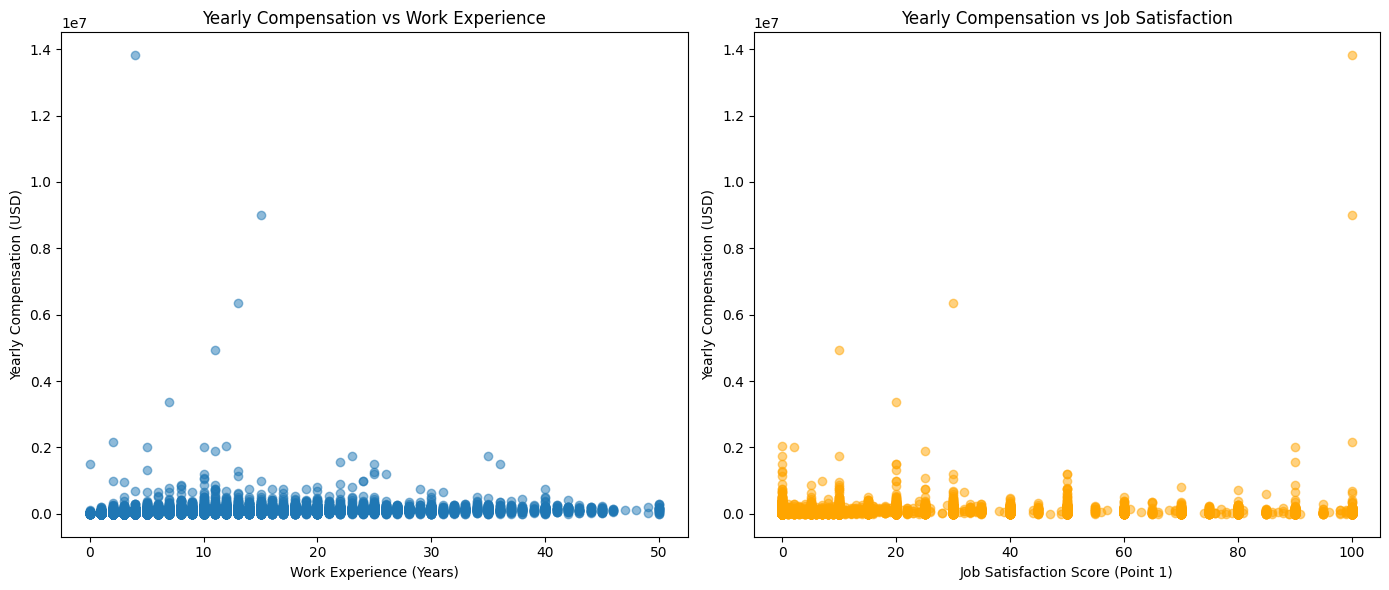

In [10]:
import matplotlib.pyplot as plt

# Select relevant columns and drop rows with missing values
df_scatter = df[['ConvertedCompYearly', 'WorkExp', 'JobSatPoints_1']].dropna()

plt.figure(figsize=(14, 6))

# Scatter plot: ConvertedCompYearly vs WorkExp
plt.subplot(1, 2, 1)
plt.scatter(df_scatter['WorkExp'], df_scatter['ConvertedCompYearly'], alpha=0.5)
plt.xlabel('Work Experience (Years)')
plt.ylabel('Yearly Compensation (USD)')
plt.title('Yearly Compensation vs Work Experience')

# Scatter plot: ConvertedCompYearly vs JobSatPoints_1
plt.subplot(1, 2, 2)
plt.scatter(df_scatter['JobSatPoints_1'], df_scatter['ConvertedCompYearly'], alpha=0.5, color='orange')
plt.xlabel('Job Satisfaction Score (Point 1)')
plt.ylabel('Yearly Compensation (USD)')
plt.title('Yearly Compensation vs Job Satisfaction')

plt.tight_layout()
plt.show()


In [11]:
print("""
Interpretation:

- Yearly Compensation vs Work Experience:
  The scatter plot shows that most respondents have compensation clustered at lower levels, with some high earners spread across various experience levels.
  There isn't a very clear linear increase in compensation with work experience; however, higher experience tends to associate with higher compensation outliers.

- Yearly Compensation vs Job Satisfaction:
  Compensation is broadly spread across different satisfaction scores, with no strong clear pattern.
  Some respondents with both low and high job satisfaction have a wide range of compensation, including very high salaries.
  This suggests that job satisfaction may not be strongly correlated with compensation alone.
""")



Interpretation:

- Yearly Compensation vs Work Experience:
  The scatter plot shows that most respondents have compensation clustered at lower levels, with some high earners spread across various experience levels.
  There isn't a very clear linear increase in compensation with work experience; however, higher experience tends to associate with higher compensation outliers.

- Yearly Compensation vs Job Satisfaction:
  Compensation is broadly spread across different satisfaction scores, with no strong clear pattern.
  Some respondents with both low and high job satisfaction have a wide range of compensation, including very high salaries.
  This suggests that job satisfaction may not be strongly correlated with compensation alone.



<h3>Summary</h3>


In this lab, you practiced essential skills in correlation analysis by:

- Examining the distribution of yearly compensation with histograms and box plots.
- Detecting and removing outliers from compensation data.
- Calculating correlations between key variables such as compensation, work experience, and job satisfaction.
- Visualizing relationships with scatter plots and heatmaps to gain insights into the associations between these features.

By following these steps, you have developed a solid foundation for analyzing relationships within the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
